## Cosmology - Problem Sheet 5

### Drishika Nadella

In [1]:
# Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

import warnings
warnings.filterwarnings("ignore")

# Some plot formatting
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['axes.titlesize'] = 10

#### 1

Let us load the cosmological parameters of some common models:

In [2]:
# Define cosmological parameters for the Einstein-de Sitter Universe
EdS = {'H0': 67.3, 'Om': 1., 'Ol': 0., 'Or': 0., 'k': 0.} 

# Define cosmological parameters the de Sitter Universe
LowM = {'H0': 67.3, 'Om': 0.3, 'Ol': 0., 'Or': 0., 'k': 0.}

# Define cosmological parameters the de Sitter Universe
LCDM = {'H0': 67.3, 'Om': 0.315, 'Ol': 0.685, 'Or': 2.47 * 1.e-5 / 0.67**2, 'k': 0.}
# LCDM = {'H0': 67.3, 'Om': 0.315, 'Ol': 0.685, 'Or': 0., 'k': 0.}

To find the angular diameter distance $d_A$, we use the following formula:

$$ d_A = \frac{1}{1+z}d_{com}$$ 

where $z$ is the redshift and $d_{com}$ is the comoving distance of the object. To calculate the comoving distance, I borrow the same functions I used in Exercise 2. 

In [3]:
def integrand(z, H0, Om, Or, Ol):
    c = 3.e5      # Speed of light (km/s)
    return c / Hubble_factor(z, H0, Om, Or, Ol)

def dcomov(z, H0, Om, Or, Ol):
    
    """
    Calculates the comoving distance of an object at a given redshift and Hubble parameter
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    dcom:    Comoving distance of the object [Mpc]
    """
    
    dcom, _ = quad(integrand, 0, z, args=(H0, Om, Or, Ol))
    return dcom


The Hubble parameter function used to calculate the comoving distance is given as below (also borrowed from Exercise 2):

In [4]:
def Hubble_factor(z, H0, Om, Or, Ol):
    
    """
    Function to calculate the Hubble parameter at a given time/redshift for a specific cosmological model
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    H:       Hubble parameter at the given redshift for the given cosmological model
    """
    
    Ez = np.sqrt((1. + z)**4. * Or + (1. + z)**3. * Om + (1. + z)**2. * (1. - Om - Or - Ol) + Ol)
    H = H0 * Ez
    return H

In [5]:
def dproper(dcom, z):
    """
    Function to calculate the proper distance / physical distance from the comoving distance
    
    Inputs:
    ------
    dcom:     Comoving distance at a given redshift [Mpc]
    z:        Redshift 
    
    Outputs:
    -------
    dphys:    Physical distance at a given redshift [Mpc]
    """
    
    dphys = 1. / (1. + z) * dcom
    return dphys

I also invoke the proper distance function above since we need to plot the proper distance as well. Now, defining the angular diameter distance function:

In [6]:
def dangular(z, H0, Om, Or, Ol):
    """
    Calculates angular diameter distance 
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    dc:      Comoving distance [Mpc]
    da:      Angular diameter distance [Mpc]
    """
    
    # Calculate comoving distances and save them in dc
    dc = []                                        # Comoving distance list
    Hp = Hubble_factor(z, H0, Om, Or, Ol)          # Hubble factors at different z
    for i in z:
        dc.append(dcomov(i, H0, Om, Or, Ol))
    dc = np.asarray(dc)
    
    # Angular diameter distance calculation
    da = 1. / (1. + z) * dc
    return dc, da

Now, let us calculate the bolometric flux in terms of bolometric luminosity $L_{bol}$. The bolometric flux $f$ can be calculated as:

$$ f = \frac{L_{bol}}{4\pi d_L^2} $$

In terms of $L_{bol}$, $f$ simply becomes:

$$ f_L = \frac{1}{4\pi d_L^2} $$

where $d_L$ is the luminosity distance and is related to the angular diameter distance $d_A$ as:

$$ d_L(z) = (1+z)^2 d_A$$ 

In [7]:
def dlum(z, da):
    """
    Calculates luminosity distance
    
    Inputs:
    ------
    z:      Redshift
    da:     Angular diameter distance [Mpc]
    
    Outputs:
    -------
    dl:     Luminosity distance [Mpc]
    
    """
    dl = (1+z)**2 * da
    return dl

def flux(z, H0, Om, Or, Ol):
    """
    Calculates bolometric flux in terms of bolometric luminosity i.e. f_bol / L_bol
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    fL:      Bolometric flux in terms of bolometric luminosity [1/Mpc^2]
    
    """
    _, da = dangular(z, H0, Om, Or, Ol)        # Calculate angular diameter distance
    dl = dlum(z, da)                           # Calculate luminosity distance
    fL = 1. / (4. * np.pi * dl**2)
    return fL

In [8]:
# Calculate quantities for redshift from 0 to 1000
z = np.linspace(0, 1000, 10000)

# Calculate angular diameter distance for EdS, lowM, LCDM models
dc_EdS, da_EdS = dangular(z, EdS['H0'], EdS['Om'], EdS['Or'], EdS['Ol'])
dc_lowM, da_lowM = dangular(z, LowM['H0'], LowM['Om'], LowM['Or'], LowM['Ol'])
dc_LCDM, da_LCDM = dangular(z, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol'])

# Calculate proper distances for EdS, lowM, LCDM models
dp_EdS = dproper(dc_EdS, z)
dp_lowM = dproper(dc_lowM, z)
dp_LCDM = dproper(dc_LCDM, z)
    
# Calculate fluxes for EdS, lowM, LCDM models
fl_EdS = flux(z, EdS['H0'], EdS['Om'], EdS['Or'], EdS['Ol'])
fl_lowM = flux(z, LowM['H0'], LowM['Om'], LowM['Or'], LowM['Ol'])
fl_LCDM = flux(z, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol'])

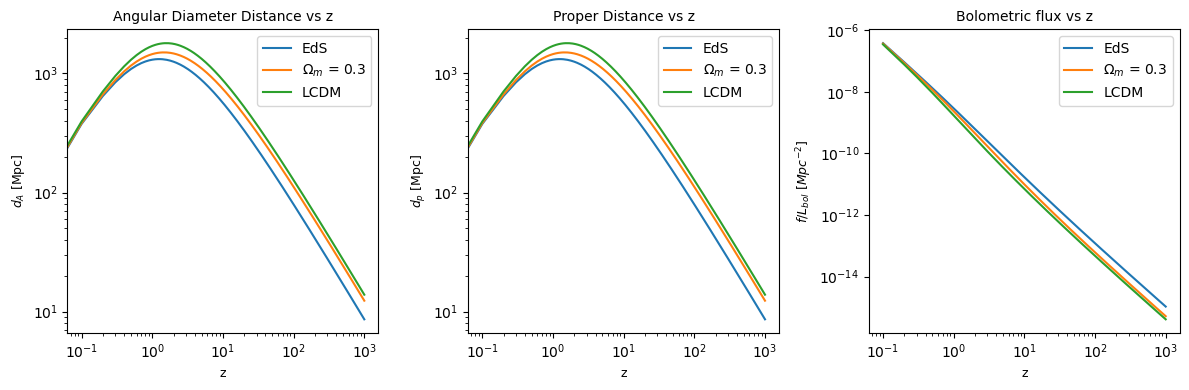

In [9]:
# Plotting

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

# Plotting angular diameter distances
ax1.plot(z, da_EdS, label='EdS')
ax1.plot(z, da_lowM, label=r'$\Omega_m$ = 0.3')
ax1.plot(z, da_LCDM, label='LCDM')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('z')
ax1.set_ylabel(r'$d_A$ [Mpc]')
ax1.set_title('Angular Diameter Distance vs z')
ax1.legend()

# Plotting proper distances
ax2.plot(z, dp_EdS, label='EdS')
ax2.plot(z, dp_lowM, label=r'$\Omega_m$ = 0.3')
ax2.plot(z, dp_LCDM, label='LCDM')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('z')
ax2.set_ylabel(r'$d_p$ [Mpc]')
ax2.set_title('Proper Distance vs z')
ax2.legend()

# Plotting fluxes
ax3.plot(z, fl_EdS, label='EdS')
ax3.plot(z, fl_lowM, label=r'$\Omega_m$ = 0.3')
ax3.plot(z, fl_LCDM, label='LCDM')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('z')
ax3.set_ylabel(r'$f / L_{bol}$ [$Mpc^{-2}$]')
ax3.set_title('Bolometric flux vs z')
ax3.legend()

plt.tight_layout()
plt.show()

The angular diameter distance and the physical distance are identical. They have the same formulae. The angular diameter distance increases with increasing redshift up to a certain point: as the object is further away from us, its angular diameter distance increases. But the proper/angular diameter distance also considers the expansion of the Universe. So at increasing redshifts beyond the 'turning point', the Universe had not expanded as much, so the proper distance begins to decrease at higher redshifts because the Universe was more compact then. Both distances are identical in their values because the angular diameter distance essentially considers the angle subtended by the physical size of the object as seen by us, which means it also considers the expansion of the Universe like the proper distance. When we compare the different cosmological models, we see that the Einstein-de Sitter model has a lower angular diameter distance at each redshift compared to the other 2 models since the expansion of the Universe is decelerated in the EdS model, and therefore the Universe has not expanded as much, and the distances are hence smaller.

Now, let us consider the third plot, the bolometric flux as a function of bolometric luminosity vs z. We see that with increasing redshift, the flux decreases. Since flux decreases with increasing distance and therefore redshift, the bolometric flux decreases here. All 3 cosmological models have comparable bolometric fluxes at every redshift. The Einstein-de Sitter model has a slightly higher flux at larger redshifts, probably due to increased matter density in that model, which increases the flux emitted.

Finding the corresponding values for z = 0.1, 1.0, 3.0 and 6.0.

In [10]:
z_q = np.array([0.1, 1., 3., 6])
z_r = np.round(z, 1)
ids = np.searchsorted(z_r, z_q)

da_136_eds = da_EdS[ids]
da_136_lowm = da_lowM[ids]
da_136_lcdm = da_LCDM[ids]

dp_136_eds = dp_EdS[ids]
dp_136_lowm = dp_lowM[ids]
dp_136_lcdm = dp_LCDM[ids]

fl_136_eds = fl_EdS[ids]
fl_136_lowm = fl_lowM[ids]
fl_136_lcdm = fl_LCDM[ids]

[ 377.20914711 1305.62964923 1114.37128189  792.18646559] [ 383.45974088 1454.67860702 1347.4267287  1005.59615772] [ 395.5401544  1704.30622407 1629.82258333 1205.76830232]
[ 377.20914711 1305.62964923 1114.37128189  792.18646559] [ 383.45974088 1454.67860702 1347.4267287  1005.59615772] [ 395.5401544  1704.30622407 1629.82258333 1205.76830232]
[3.81978721e-07 2.91704602e-09 2.50241913e-10 5.27951745e-11] [3.69627311e-07 2.34989893e-09 1.71162869e-10 3.27643726e-11] [3.47394104e-07 1.71193798e-09 1.16987433e-10 2.27887939e-11]


Summarizing in a table:

<center>

| Model             | z    | $$d_A$$ [Mpc] | $$d_p$$ [Mpc] | $$F_L$$ $$[10^{-9} \textrm{Mpc}^{-2}]$$ |
| :---------------- | ---- | -------- | ------- | --------------------: |
|EdS                | 0.1  |   377.2   | 377.2  | 382  |
|EdS                | 1.0  |  1305.6   | 1305.6 | 2.91 |
|EdS                | 3.0  |  1114.4   | 1114.4 | 0.25 |
|EdS                | 6.0  |  792.2    | 792.2  | 0.052|
|$$\Omega_m = 0.3$$ | 0.1  |   383.5   | 383.5  | 370  |
|$$\Omega_m = 0.3$$ | 1.0  |  1454.7   | 1454.7 | 2.35 |
|$$\Omega_m = 0.3$$ | 3.0  |  1347.4   | 1347.4 | 0.17 |
|$$\Omega_m = 0.3$$ | 6.0  |  1005.6   | 1005.6 | 0.032|
|LCDM               | 0.1  |   395.5   | 395.5  | 347  |
|LCDM               | 1.0  |  1704.3   | 1704.3 | 1.71 |
|LCDM               | 3.0  |  1629.8   | 1629.8 | 0.12 |
|LCDM               | 6.0  |  1205.8   | 1205.8 | 0.028|
    
</center>

#### 2.

If the transverse length of the region is given by the particle horizon $d_{ph}(z)$, then the angle subtended by the region is given by:

$$\theta(z) = \frac{d_{ph}(z)}{d_A(z)} $$

where $d_A(z)$ is the angular diameter distance. The particle horizon distance is the physical distance that light travels from the beginning of the Universe to the given redshift. It is given by:

$$ d_{ph}(z) = \frac{1}{1+z} \int_z^\infty \frac{c}{H(z^\prime)} dz^\prime $$

In [11]:
def integrand3(z, H0, Om, Or, Ol):
    c = 3.e5      # Speed of light (km/s)
    return c / Hubble_factor(z, H0, Om, Or, Ol)

def particle_horizon(z, H0, Om, Or, Ol):
    dph, _ = quad(integrand3, z, np.inf, args=(H0, Om, Or, Ol))
    dph = 1. / (1. + z) * dph
    return dph

In [12]:
z1100 = 1100.        # Redshift at time of last scattering

Calculating $\theta_{hor}$ for the $\textrm{EdS}$ model:

In [13]:
# Calculating the particle horizon distance at z=1100
dph1100_eds = particle_horizon(z1100, EdS['H0'], EdS['Om'], EdS['Or'], EdS['Ol'])      # Particle horizon [Mpc]
print(f"EdS Particle Horizon Distance at z=1100: {dph1100_eds:2f} Mpc")

# Calculating the angular diameter distance at z=1100
dc1100_eds = dcomov(z1100, EdS['H0'], EdS['Om'], EdS['Or'], EdS['Ol'])                 # Comoving distance [Mpc]
da1100_eds = 1. / (1. + z1100) * dc1100_eds                                            # Angular diameter distance [Mpc]
print(f"EdS Angular Diameter Distance at z=1100: {da1100_eds:2f} Mpc")

# Calculating horizon size theta
theta1100_eds = np.rad2deg(dph1100_eds / da1100_eds)
print(f"EdS Horizon size at z=1100: {theta1100_eds:2f} degrees")

EdS Particle Horizon Distance at z=1100: 0.244037 Mpc
EdS Angular Diameter Distance at z=1100: 7.853424 Mpc
EdS Horizon size at z=1100: 1.780405 degrees


Calculating $\theta_{hor}$ for the $\Omega_m = \textrm{0.3}$ model:

In [14]:
# Calculating the particle horizon distance at z=1100
dph1100_lom = particle_horizon(z1100, LowM['H0'], LowM['Om'], LowM['Or'], LowM['Ol'])  # Particle horizon [Mpc]
print(f"Low-M Particle Horizon Distance at z=1100: {dph1100_lom:2f} Mpc")

# Calculating the angular diameter distance at z=1100
dc1100_lom = dcomov(z1100, LowM['H0'], LowM['Om'], LowM['Or'], LowM['Ol'])             # Comoving distance [Mpc]
da1100_lom = 1. / (1. + z1100) * dc1100_lom                                            # Angular diameter distance [Mpc]
print(f"Low-M Angular Diameter Distance at z=1100: {da1100_lom:2f} Mpc")

# Calculating horizon size theta
theta1100_lom = np.rad2deg(dph1100_lom / da1100_lom)
print(f"Low-M Horizon size at z=1100: {theta1100_lom:2f} degrees")

Low-M Particle Horizon Distance at z=1100: 0.445391 Mpc
Low-M Angular Diameter Distance at z=1100: 11.264745 Mpc
Low-M Horizon size at z=1100: 2.265388 degrees


Calculating $\theta_{hor}$ for the $\Lambda \textrm{CDM}$ model:

In [15]:
# Calculating the particle horizon distance at z=1100
dph1100_lcdm = particle_horizon(z1100, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol'])  # Particle horizon [Mpc]
print(f"LCDM Particle Horizon Distance at z=1100: {dph1100_lcdm:2f} Mpc")

# Calculating the angular diameter distance at z=1100
dc1100_lcdm = dcomov(z1100, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol'])             # Comoving distance [Mpc]
da1100_lcdm = 1. / (1. + z1100) * dc1100_lcdm                                           # Angular diameter distance [Mpc]
print(f"LCDM Angular Diameter Distance at z=1100: {da1100_lcdm:2f} Mpc")

# Calculating horizon size theta
theta1100_lcdm = np.rad2deg(dph1100_lcdm / da1100_lcdm)
print(f"LCDM Horizon size at z=1100: {theta1100_lcdm:2f} degrees")

LCDM Particle Horizon Distance at z=1100: 0.284101 Mpc
LCDM Angular Diameter Distance at z=1100: 12.645754 Mpc
LCDM Horizon size at z=1100: 1.287215 degrees


Therefore, the angle $\theta_h$ subtended by a region whose transverse length is equal to the size of the particle horizon at redshift z~1100 for the EdS model is $1.78^\circ$, for the low matter density model is $2.26^\circ$, and for the LCDM model is $1.28^\circ$. Since $\theta_h$ depends on the angular diameter distance, which in turn depends on the curvature of the Universe and the density parameters, we could theoretically constrain the density parameters and the curvature of the cosmological model.

#### 3

The Tinker halo mass function is given by:

$$ \frac{dn}{dM}(z) = f(\sigma) \frac{\bar{\rho}_m}{M} \frac{d\ln[\sigma^{-1}(M,z)]}{dM} $$

where $\sigma$ is given by:

$$ \sigma^2 (M, z) = \frac{1}{2\pi^2} \int_0^\infty k^2 P_{lin}(k,z)W^2(k, M) dM $$

For the Tinker HMF, $f(\sigma)$ is given by:

$$ f(\sigma) = A \left[ \left( \frac{\sigma}{b} \right)^{-a} + 1 \right] \exp \left( - \frac{c}{\sigma^2}\right)$$

Here, I consider the ```Tinker200``` parameters, which are given by $A = 0.186$, $a = 1.47$, $b = 2.57$ and $c = 1.19$. To implement this, I borrow all the relevant functions used in Exercise 4.

In [16]:
def density_param(z, OM0, OR0, OL0):
    
    """
    Calculates the density parameter at a certain redshift for a given cosmological model
    
    Inputs:
    ------
    z:       Redshift
    OM0:     Present day matter density parameter
    OR0:     Present day radiation density parameter
    OL0:     Present day dark energy density parameter   
    
    Outputs:
    -------
    OMt, ORt, OLt:       Matter, radiation and dark energy density parameters at a given epoch
    """
    
    Ez2 = ((1. + z)**4. * OR0 + (1. + z)**3. * OM0 + (1 + z)**2. * (1. - OM0 - OR0 - OL0) + OL0)
    OMt = OM0 * (1. + z)**3. / Ez2
    ORt = OR0 * (1. + z)**4. / Ez2
    OLt = OL0 / Ez2
    
    return OMt, ORt, OLt

In [17]:
def g_z(z, Omz, Olz):
    
    """
    Calculates g(z) at a given redshift for a given cosmological model
    
    Inputs:
    ------
    z:        Redshift
    Omz:      Matter density parameter at given redshift z
    Olz:      Dark energy density parameter at given redshift z
    
    Outputs:
    -------
    gz:       g(z) at given redshift
    """
    
    gz = 2.5 * Omz / (Omz**(4./7.) - Olz + (1. + Omz / 2.) * (1. + Olz / 70.))
    return gz

In [18]:
def growth_factor(z, Om, Or, Ol):
    
    """
    Calculates the growth factor for a certain cosmological model and redshift
    
    Inputs:
    ------
    z:       Redshift
    Om:      Present day matter density parameter
    Or:      Present day radiation density parameter
    Ol:      Present day dark energy density parameter
    
    Outputs:
    -------
    dplus:   Growth factor for a given redshift and cosmological model using the Carroll1992 fitting formula
    """
    
    Omz, _, Olz = density_param(z, Om, Or, Ol)
    gz = g_z(z, Omz, Olz)            # Using parameter values at z=z for g(z)
    g0 = g_z(0, Om, Ol)              # Using parameter values at z=0 for g(0)
    dplus = 1. / (1. + z) * gz / g0
    return dplus

In [19]:
def WR8(k, R):
    """
    Function to calculate the smoothing function
    
    Inputs:
    ------
    k:       Wavenumber array (1/Mpc)
    R:       Smoothing radius (Mpc/h)
    
    Outputs:
    -------
    Wr8:     Smoothing function 
    
    """
    
    Wr8 = 3 * (np.sin(k * R) - k * R * np.cos(k * R)) / (k * R)**3
    return Wr8

In [20]:
def integrand4(k, ns, h, Om, Ob, R):
    return k**2 * k**ns * BBKS_Tk(k, h, Om, Ob) * WR8(k, R)

def Amplitude(sigma8, k, ns, h, Om, Ob, R):
    """
    Calculates the amplitude of the linear power spectrum
    
    Inputs:
    ------
    sigma8:    Matter density fluctuation on a scale of 8 Mpc/h (defined by cosmological model) 
    k:         Wave number array (1/Mpc)
    ns:        Slope of primordial power spectrum (defined by cosmological model)
    h:         Reduced Hubble parameter
    Om:        Present-day matter density parameter (defined by cosmological model)
    Ob:        Present-day baryon matter density parameter (defined by cosmological model)
    R:         Smoothing radius (Mpc/h)
    
    Outputs:
    -------
    A:         Amplitude of primordial power spectrum
    
    """
    temp, _ = quad(integrand4, 0, np.inf, args=(ns, h, Om, Ob, R))
    temp = temp / (2. * np.pi**2)
    A = sigma8**2 / temp
    return A

In [21]:
def BBKS_Tk(k, h, Om, Ob):
    """
    Calculates the Bardeen et al. (1986) transfer function
    
    Inputs:
    ------
    k:         Wave number array (1/Mpc)
    h:         Reduced Hubble parameter
    Om:        Present-day matter density parameter (defined by cosmological model)
    Ob:        Present-day baryon matter density parameter (defined by cosmological model)
    
    Outputs:
    -------
    Tk**2:     The SQUARE (!) of the transfer function
    
    """
    gamma = Om * h * np.exp(- Ob - np.sqrt(2 * h) * Ob / Om)
    q = k / (gamma * h)
    Tk = np.log(1. + 2.34 * q) / (2.34 * q) * 1. / (1 + 3.89 * q + (16.1 * q)**2. + (5.46 * q)**3. + (6.71 * q)**4.)**0.25
    return Tk**2

In [22]:
def linear_Pspec(Dplus, A, ns, k, Tk2):
    """
    Calculates the linear power spectrum of the cosmological density fluctuations
    
    Inputs:
    ------
    Dplus:      Growth factor
    A:          Amplitude
    ns:         Primordial power spectrum (defined by cosmological model)
    k:          Wavenumber array (1/Mpc)
    Tk2:        Square of transfer function
    
    Outputs:
    -------
    Plin:       Linear power spectrum
    
    """
    Plin = Dplus**2 * A * k**ns * Tk2
    return Plin

In [23]:
def MtoR(m, rho):
    r = (3. * m / (4. * np.pi * rho))**(1. / 3.)
    # m = 4. / 3. * np.pi * rho * r**3
    return r

In [24]:
def Wmk(k, M, rho):
    R = MtoR(M, rho)
    Wkm = 3 * (np.sin(k * R) - k * R * np.cos(k * R)) / (k * R)**3
    return Wkm

In [25]:
def integrand5(k, s8, ns, h, Om, Ob, M, R, rho):
    return k**2 * Amplitude(s8, k, ns, h, Om, Ob, R) * k**ns * BBKS_Tk(k, h, Om, Ob) * Wmk(k, M, rho)**2

def sigma2M(k, Dplus, s8, ns, h, Om, Ob, M, R, rho):
    temp, _ = quad(integrand5, 0, np.inf, args=(s8, ns, h, Om, Ob, M, R, rho))
    sigma2 = temp / (2. * np.pi**2) * Dplus**2
    return sigma2

In [26]:
def Tinker(sigma, A, a, b, c):
    """
    Calculate f(sigma) in the Tinker formalism
    
    Inputs:
    ------
    sigma:        Variance of matter density field for array of masses
    A, a, b, c:   Parameters defined for Tinker HMF (values depend on type of Tinker function)
    
    Outputs:
    -------
    fT:     f(sigma) for Tinker function
    """
    
    fsigma = A * ((sigma / b)**(-a) + 1) * np.exp(-c / sigma**2)
    return fsigma

In [27]:
def HMF_anl(sigma, rhom, M, model, tparam=0):
    """
    Calculates analytical HMF for different formalisms of HMF
    
    Inputs:
    ------
    sigma:   Variance of matter density field for array of masses
    rhom:    Mean matter density (Msun / Mpc^3)
    M:       Array of halo masses (Msun)
    model:   Analytical HMF formalism to use (PS = Press-Schechter, ST = Sheth-Tormen, T = Tinker)
    tparam:  Dictionary of Tinker parameters A, a, b, c (default = 0 if PS or ST used)
    
    Outputs:
    -------
    dndM:    Analytical halo mass function 
    """
    
    # Choose the right model for f(sigma)
    if model == 'PS':
        f = Press_Schechter(sigma)
    elif model == 'ST':
        f = Sheth_Tormen(sigma)
    elif model == 'T':
        f = Tinker(sigma, tparam['A'], tparam['a'], tparam['b'], tparam['c'])
    
    # Calculate dn/dM
    x = np.log(1. / sigma)
    dx = np.gradient(x)
    dM = np.gradient(M)
    dndM = f * rhom / M * dx / dM
    return dndM

In [28]:
def plotting(x, y, ax, xlabel, ylabel, title, leglabel, xscale, yscale):
    """
    A general plotting function
    """
    ax.plot(x, y, label=leglabel)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.legend()

Now that we have loaded all functions, let us load the required parameters.

In [29]:
# Defining the parameters for Tinker200 HMF
T200 = {'A': 0.186, 'a': 1.47, 'b': 2.57, 'c': 1.19}

# Defining the cosmological parameters
LCDM = {'H0': 67.3, 'Om': 0.315, 'Ol': 0.685, 'Or': 2.47 * 1.e-5 / 0.67**2, 'Ob': 0.049, 'k': 0., 'sigma8': 0.829, 'ns': 0.96}
h = LCDM['H0'] / 100.                      # Reduced Hubble parameter [Mpc/km/s]
z3 = 0                                     # Redshift
Marray = np.logspace(12, 15.5, 20)         # Array of masses [Msun]
rhom = LCDM['Om'] * 1.36e11                # Mean matter density [Msun / Mpc^3]
Rarray = MtoR(Marray, rhom)                # Array of radii [Mpc]
k = np.logspace(-4, 1, 100)                # Wavenumbers [1/Mpc]

Let us vary $h$, $\Omega_m$, and $\sigma_8$ by $\pm 3\%$.

In [30]:
def vary_param(par):
    """
    Function to vary parameter par by +/- 3%
    """
    parm = par - 0.03 * par
    parp = par + 0.03 * par
    return np.array([parm, par, parp])

In [31]:
harray = vary_param(h)
Omarray = vary_param(LCDM['Om'])
Olarray = 1. - Omarray
s8array = vary_param(LCDM['sigma8'])

Calculating the HMF with one varying set of parameters at a time. Let us begin with $h$:

In [32]:
HMF_T200_hs = []

for hred in harray:
    
    sigma2_hs = []
    for i in range(len(Marray)):

        # Calculating D+ for the LCDM model
        dplus_hs = growth_factor(z3, LCDM['Om'], LCDM['Or'], LCDM['Ol'])

        # Calculating variance in matter density
        sigma2_hs.append(sigma2M(k, dplus_hs, LCDM['sigma8'], LCDM['ns'], hred, LCDM['Om'], LCDM['Ob'], Marray[i], Rarray[i], rhom))
    
    sigma_hs = np.sqrt(np.asarray(sigma2_hs))
    HMF_T200_hs.append(HMF_anl(sigma_hs, rhom, Marray, 'T', tparam = T200))

Now, calculating for varying $\Omega_m$:

In [33]:
HMF_T200_oms = []

for j in range(len(Omarray)):
    
    sigma2_oms = []
    for i in range(len(Marray)):

        # Calculating D+ for the LCDM model
        dplus_oms = growth_factor(z3, Omarray[j], LCDM['Or'], Olarray[j])

        # Calculating variance in matter density
        sigma2_oms.append(sigma2M(k, dplus_oms, LCDM['sigma8'], LCDM['ns'], h, Omarray[j], LCDM['Ob'], Marray[i], Rarray[i], rhom))
    
    sigma_oms = np.sqrt(np.asarray(sigma2_oms))
    HMF_T200_oms.append(HMF_anl(sigma_oms, rhom, Marray, 'T', tparam = T200))

Now, finally following the same procedure for $\sigma_8$:

In [34]:
HMF_T200_s8s = []

for s8 in s8array:
    
    sigma2_s8s = []
    for i in range(len(Marray)):

        # Calculating D+ for the LCDM model
        dplus_s8s = growth_factor(z3, LCDM['Om'], LCDM['Or'], LCDM['Ol'])

        # Calculating variance in matter density
        sigma2_s8s.append(sigma2M(k, dplus_s8s, s8, LCDM['ns'], h, LCDM['Om'], LCDM['Ob'], Marray[i], Rarray[i], rhom))
    
    sigma_s8s = np.sqrt(np.asarray(sigma2_s8s))
    HMF_T200_s8s.append(HMF_anl(sigma_s8s, rhom, Marray, 'T', tparam = T200))

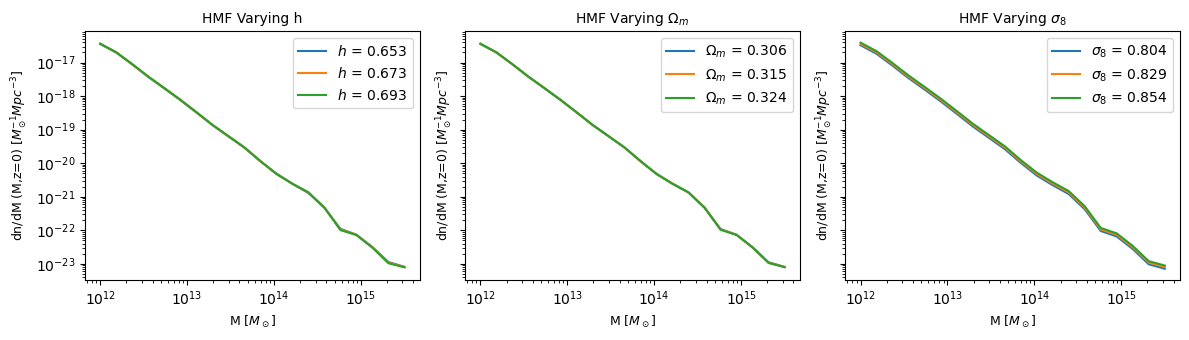

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True)

# Plotting varying h
for i in range(len(HMF_T200_hs)):
    plotting(Marray, HMF_T200_hs[i], ax=ax1, xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) [$M_\odot^{-1} Mpc^{-3}$]', title='HMF Varying h', leglabel=r'$h$ = {}'.format(np.round(harray[i], 3)), xscale='log', yscale='log')
    
# Plotting varying Omega_m
for i in range(len(HMF_T200_oms)):
    plotting(Marray, HMF_T200_oms[i], ax=ax2, xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) [$M_\odot^{-1} Mpc^{-3}$]', title=r'HMF Varying $\Omega_m$', leglabel=r'$\Omega_m$ = {}'.format(np.round(Omarray[i], 3)), xscale='log', yscale='log')
    
# Plotting varying sigma_8
for i in range(len(HMF_T200_s8s)):
    plotting(Marray, HMF_T200_s8s[i], ax=ax3, xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) [$M_\odot^{-1} Mpc^{-3}$]', title=r'HMF Varying $\sigma_8$', leglabel=r'$\sigma_8$ = {}'.format(np.round(s8array[i], 3)), xscale='log', yscale='log')

plt.tight_layout()

It looks like $\sigma_8$ varies the most out of the 3 parameters, but let us compare the varied models with the fiducial models to be sure. We do this by plotting the ratio of each model with the fiducial model for each parameter:

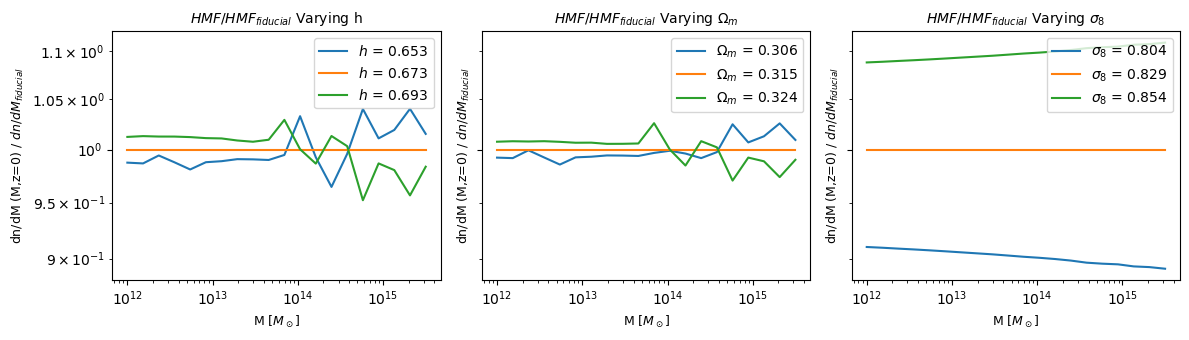

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True)

# Plotting varying h
for i in range(len(HMF_T200_hs)):
    plotting(Marray, HMF_T200_hs[i] / HMF_T200_hs[1], ax=ax1, xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) / $dn/dM_{fiducial}$', title=r'$HMF/HMF_{fiducial}$ Varying h', leglabel=r'$h$ = {}'.format(np.round(harray[i], 3)), xscale='log', yscale='log')
    
# Plotting varying Omega_m
for i in range(len(HMF_T200_oms)):
    plotting(Marray, HMF_T200_oms[i] / HMF_T200_oms[1], ax=ax2, xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) / $dn/dM_{fiducial}$', title=r'$HMF/HMF_{fiducial}$ Varying $\Omega_m$', leglabel=r'$\Omega_m$ = {}'.format(np.round(Omarray[i], 3)), xscale='log', yscale='log')
    
# Plotting varying sigma_8
for i in range(len(HMF_T200_s8s)):
    plotting(Marray, HMF_T200_s8s[i] / HMF_T200_s8s[1], ax=ax3, xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) / $dn/dM_{fiducial}$', title=r'$HMF/HMF_{fiducial}$ Varying $\sigma_8$', leglabel=r'$\sigma_8$ = {}'.format(np.round(s8array[i], 3)), xscale='log', yscale='log')

plt.tight_layout()

Clearly, we see that $\sigma_8$ is the parameter that the halo mass function is most sensitive to. This is particularly so at the higher masses, where we see that the deviations from the fiducial model are greater for all 3 parameter variations. Let us now see how the varying $\sigma_8$ is affected by different redshifts.

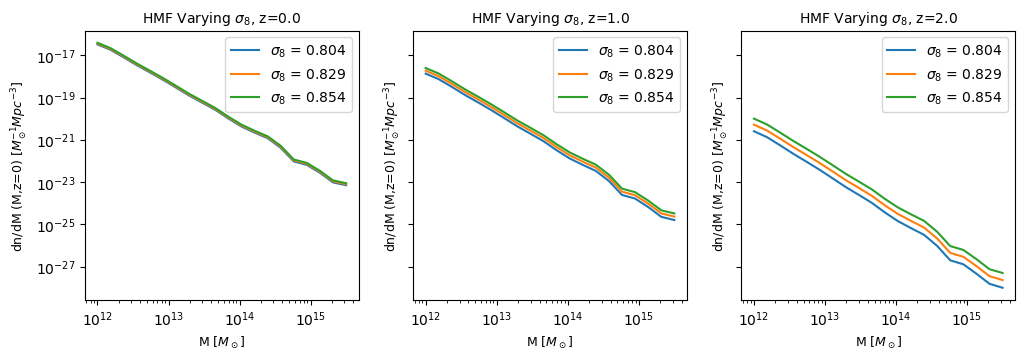

In [37]:
z3_array = np.array([0., 1., 2.])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True)
axs = [ax1, ax2, ax3]

for j in range(len(z3_array)):

    for s8 in s8array:

        sigma2_s8s = []
        for i in range(len(Marray)):

            # Calculating D+ for the LCDM model
            dplus_s8s = growth_factor(z3_array[j], LCDM['Om'], LCDM['Or'], LCDM['Ol'])

            # Calculating variance in matter density
            sigma2_s8s.append(sigma2M(k, dplus_s8s, s8, LCDM['ns'], h, LCDM['Om'], LCDM['Ob'], Marray[i], Rarray[i], rhom))

        sigma_s8s = np.sqrt(np.asarray(sigma2_s8s))
        HMF_T200_s8_zs = HMF_anl(sigma_s8s, rhom, Marray, 'T', tparam = T200)
        plotting(Marray, HMF_T200_s8_zs, ax=axs[j], xlabel=r'M [$M_\odot$]', ylabel=r'dn/dM (M,z=0) [$M_\odot^{-1} Mpc^{-3}$]', title=r'HMF Varying $\sigma_8$, z={}'.format(z3_array[j]), leglabel=r'$\sigma_8$ = {}'.format(np.round(s8, 3)), xscale='log', yscale='log')

We see that changes in $\sigma_8$ are more sensitive at higher redshifts.